# Prodigy InfoTech DataScience Task-01  


# Task-1
## 1. Ceate a bar chart or histogram to visualize the distribution of a categoricalor or continuous variable, such as the distribution of ages or genders in a population.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read dataset
df = pd.read_csv("World-Happiness-data.csv")

In [ ]:
# Change column name
df.columns=[each.split()[0] if (len(each.split())>2) else each.replace(" ","_") for each in df.columns]

In [ ]:
df.head()

# Exploratory Data Analysis

In [ ]:
df.columns

In [ ]:
# Shape
df.shape

In [ ]:
# Data types
df.dtypes

In [ ]:
# Dataframe information
df.info()

In [ ]:
df.Region.unique()

In [ ]:
#Check Missing values
df.isnull()

In [ ]:
df.isnull().sum()

## Happiness Rates by Region:--

In [ ]:
# Calculateing happiness ratio for each region
region_lists=list(df['Region'].unique())
region_happiness_ratio = []
for each in region_lists:
    region=df[df['Region']==each]
    region_happiness_rate=sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)
 
data=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
sorted_data

In [ ]:
# Happiness Rate Visualization for Region
plt.figure(figsize=(12,10))
sns.barplot(x=sorted_data['region_happiness_ratio'], y=sorted_data['region'], palette='viridis')

plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Happiness rate for regions')
plt.show()

## Happiest Countries

In [ ]:
# Bar plot for the top 10 happiest countries in the world

plt.figure(figsize=(11,9))
sns.barplot(y=df["Country"][:10], x=df["Happiness_Score"][:10], palette='coolwarm')
            
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries')
plt.show()

## Highest ranking Counteirs in each factors that contribute in overall happiness and welbeing 

In [ ]:
# Creating 3x2 subplot grid
f, axs = plt.subplots(3,2, figsize=(14, 14), constrained_layout=True)

# Data sorting for each category and selecting top 10 countries
sort_Economy = df.sort_values(by=['Economy'], ascending=False).head(10)
sort_Family = df.sort_values(by=['Family'], ascending=False).head(10)
sort_Health = df.sort_values(by=['Health'], ascending=False).head(10)
sort_Freedom = df.sort_values(by=['Freedom'], ascending=False).head(10)
sort_Trust = df.sort_values(by=['Trust'], ascending=False).head(10)
sort_Generosity = df.sort_values(by=['Generosity'], ascending=False).head(10)

# Creating barplots for each category
ax = sns.barplot(x="Country", y="Economy", data=sort_Economy, ax=axs[0, 0])
ax.tick_params(axis='x', rotation=45)
ax.set_title('Top 10 Countries - Economy')

ax = sns.barplot(x="Country", y="Family", data=sort_Family, ax=axs[0, 1])
ax.tick_params(axis='x', rotation=45)
ax.set_title('Top 10 Countries - Family')

ax = sns.barplot(x="Country", y="Health", data=sort_Health, ax=axs[1, 0])
ax.tick_params(axis='x', rotation=45)
ax.set_title('Top 10 Countries - Health')

ax = sns.barplot(x="Country", y="Freedom", data=sort_Freedom, ax=axs[1, 1])
ax.tick_params(axis='x', rotation=45)
ax.set_title('Top 10 Countries - Freedom')

ax = sns.barplot(x="Country", y="Trust", data=sort_Trust, ax=axs[2, 0])
ax.tick_params(axis='x', rotation=45)
ax.set_title('Top 10 Countries - Trust')

ax = sns.barplot(x="Country", y="Generosity", data=sort_Generosity, ax=axs[2, 1])
ax.tick_params(axis='x', rotation=45)
ax.set_title("top 10 Countries - Generosity")

# Displaying the subplot
plt.show()


## Factors which affecting the happiness_score by the regions

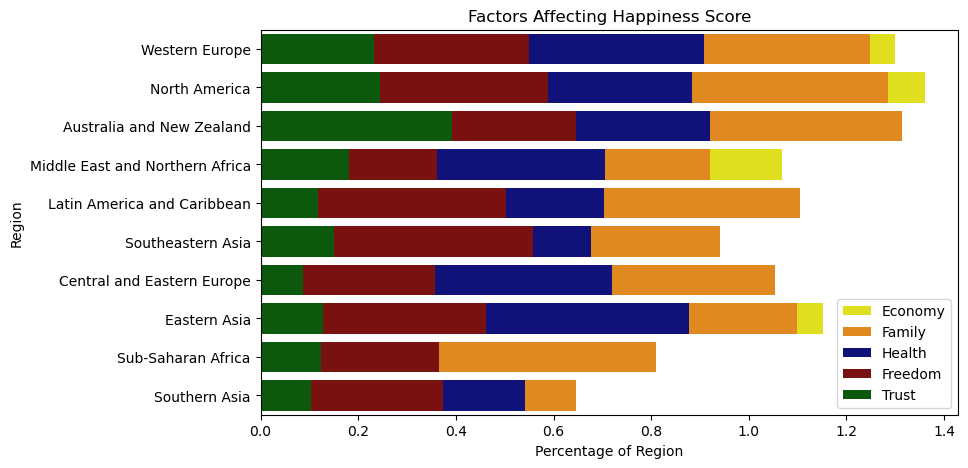

In [52]:
# Unique regions
region_lists = list(df["Region"].unique())

# Calculating the Average Values for each factors in each region
share_economy = [sum(df[df['Region'] == region]['Economy']) / len(df[df["Region"] == region]) for region in region_lists]
share_family = [sum(df[df['Region'] == region]['Family']) / len(df[df["Region"] == region]) for region in region_lists]
share_health = [sum(df[df['Region'] == region]['Health']) / len(df[df["Region"] == region]) for region in region_lists]
share_freedom = [sum(df[df['Region'] == region]['Freedom']) / len(df[df["Region"] == region]) for region in region_lists]
share_trust = [sum(df[df['Region'] == region]['Trust']) / len(df[df["Region"] == region]) for region in region_lists]

# Visualization
f, ax = plt.subplots(figsize=(9,5))
sns.set_color_codes('pastel')

sns.barplot(x=share_economy, y=region_lists, color='yellow', label="Economy")
sns.barplot(x=share_family, y=region_lists, color='darkorange', label="Family")
sns.barplot(x=share_health, y=region_lists, color='darkblue', label="Health")
sns.barplot(x=share_freedom, y=region_lists, color='darkred', label="Freedom")
sns.barplot(x=share_trust, y=region_lists, color='darkgreen', label="Trust")

ax.legend(loc='lower right', frameon=True)
ax.set(xlabel='Percentage of Region', ylabel='Region', title='Factors Affecting Happiness Score')
plt.show()

## Happiest and Unhappiest Countries

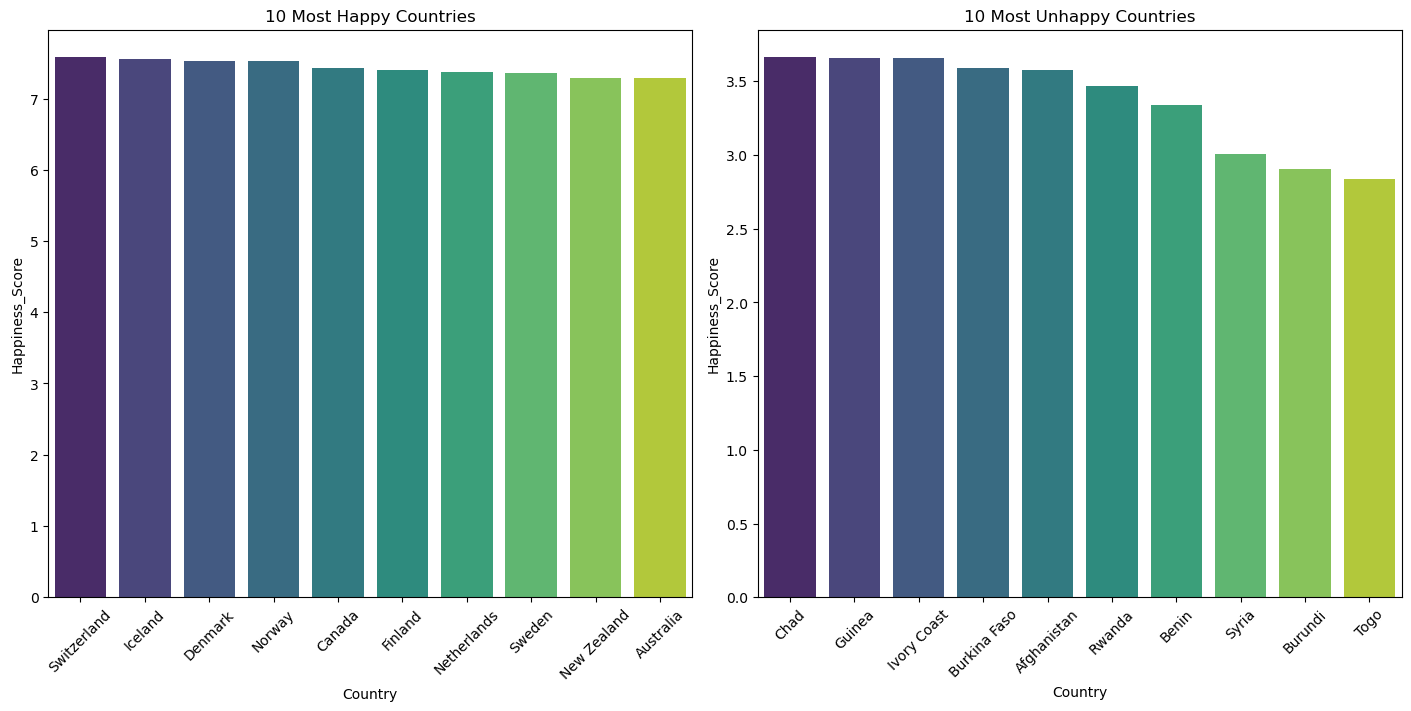

In [55]:
# Extracting the top 10 happiest countries from the DataFrame
happy_countries = df.head(10)

# Extractiong the bottom 10 (least happiest) countries from the DataFrame
sad_countries= df.tail(10)

# Creating a 1x2 subplot grid 
f, axs = plt.subplots(1, 2, figsize=(14, 7), constrained_layout=True)

# Plotting !0 Most Happy Countries
ax = sns.barplot(x="Country", y="Happiness_Score", data=happy_countries, ax=axs[0], palette="viridis")
ax.tick_params(axis='x', rotation=45)
ax.set_title("10 Most Happy Countries") 

# Plotting 10 Most Unhappy Countries
ax = sns.barplot(x="Country", y="Happiness_Score", data=sad_countries, ax=axs[1], palette="viridis")
ax.tick_params(axis='x', rotation=45)
ax.set_title("10 Most Unhappy Countries")

plt.show()